In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.6.0


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

training_set = train_datagen.flow_from_directory("/home/shaan/Documents/Symbiosis_Linux/DeepLearning/Dataset/training_set",  target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 1140 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory("/home/shaan/Documents/Symbiosis_Linux/DeepLearning/Dataset/test_set",  target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = (64,64,3)))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 4, strides = 3))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'sigmoid'))

In [11]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'sigmoid'))

In [12]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

In [14]:
import time
startTime = time.time()
cnn.fit(x = training_set, validation_data = test_set, epochs= 8)
print("Total time taken is ", round(time.time() - startTime), " seconds")

Epoch 1/8
36/36 [==============================] - 58s 2s/step - loss: 0.6879 - accuracy: 0.5430 - val_loss: 0.6077 - val_accuracy: 0.7040
Epoch 2/8
36/36 [==============================] - 56s 2s/step - loss: 0.5002 - accuracy: 0.7588 - val_loss: 0.5134 - val_accuracy: 0.7480
Epoch 3/8
36/36 [==============================] - 56s 2s/step - loss: 0.4140 - accuracy: 0.8184 - val_loss: 0.3880 - val_accuracy: 0.8270
Epoch 4/8
36/36 [==============================] - 55s 2s/step - loss: 0.3790 - accuracy: 0.8368 - val_loss: 0.4496 - val_accuracy: 0.7810
Epoch 5/8
36/36 [==============================] - 57s 2s/step - loss: 0.3894 - accuracy: 0.8193 - val_loss: 0.6474 - val_accuracy: 0.7460
Epoch 6/8
36/36 [==============================] - 57s 2s/step - loss: 0.3850 - accuracy: 0.8175 - val_loss: 0.5204 - val_accuracy: 0.7840
Epoch 7/8
36/36 [==============================] - 56s 2s/step - loss: 0.3937 - accuracy: 0.8228 - val_loss: 0.6613 - val_accuracy: 0.7400
Epoch 8/8
36/36 [==========

In [15]:
import threading
import time

def train():
    cnn.fit(x = training_set, validation_data = test_set, epochs= 4)

t = threading.Thread(target=train)
t2 =  threading.Thread(target=train)
startTime2 = time.time()
t.start()
t2.start()

t.join()
t2.join()
print("Total time taken is ", round(time.time() - startTime2), " seconds")

Epoch 1/4
Epoch 1/4
36/36 [==============================] - 64s 2s/step - loss: 0.5787 - accuracy: 0.7238 - val_loss: 0.8440 - val_accuracy: 0.5959
Epoch 2/4
36/36 [==============================] - 65s 2s/step - loss: 0.5757 - accuracy: 0.7259 - val_loss: 0.6616 - val_accuracy: 0.7500
Epoch 2/4
36/36 [==============================] - 49s 1s/step - loss: 0.4310 - accuracy: 0.8125 - val_loss: 0.4447 - val_accuracy: 0.7715
Epoch 3/4
36/36 [==============================] - 49s 1s/step - loss: 0.5161 - accuracy: 0.7464 - val_loss: 0.4484 - val_accuracy: 0.7699
Epoch 3/4
34/36 [===========================>..] - ETA: 1s - loss: 0.3946 - accuracy: 0.8219 1/36 [================>.............] -

KeyboardInterrupt: 

In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/shaan/Documents/Symbiosis_Linux/DeepLearning/Dataset/single_prediction/unseen/intervened_or_nonintervened_new1.png', target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

training_set.class_indices

if result[0][0] == 1:
    prediction = "intervened"
else:
    prediction = 'nonintervened'

In [30]:
print(prediction)

nonintervened


In [31]:
disp_image = image.load_img('/home/shaan/Documents/Symbiosis_Linux/DeepLearning/Dataset/single_prediction/unseen/intervened_or_nonintervened_new1.png', target_size=(64,64))

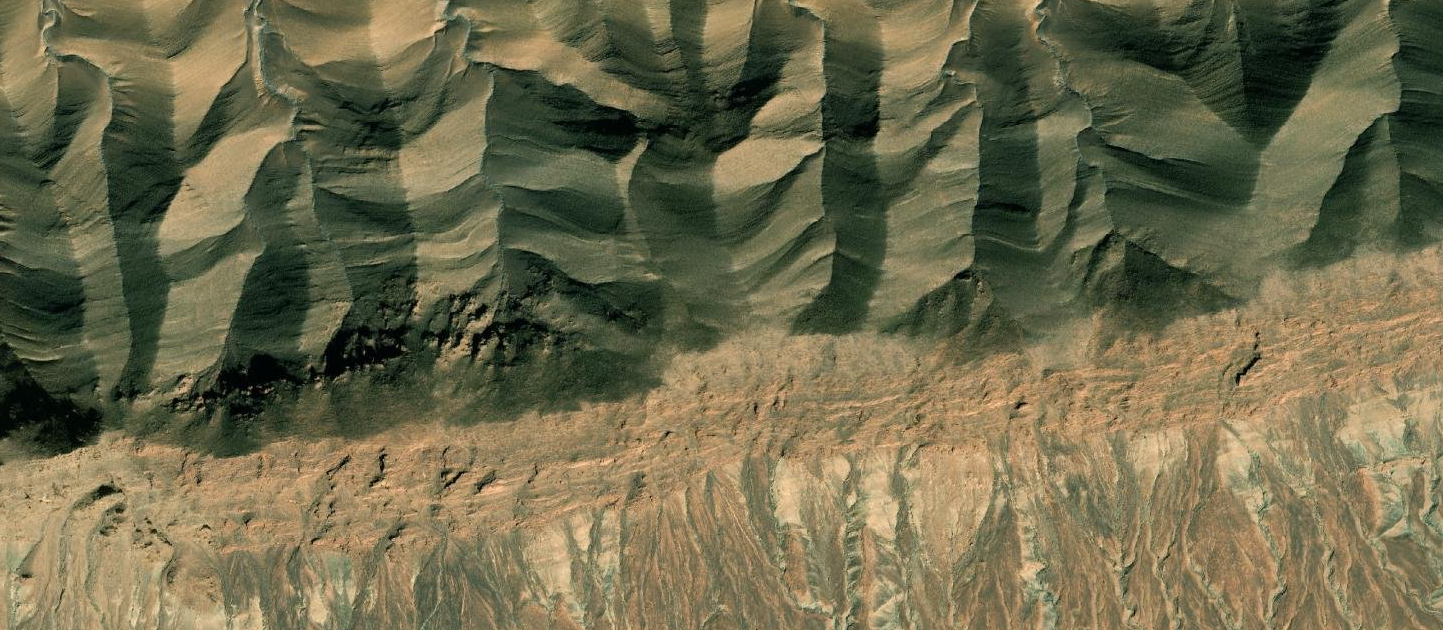

In [32]:
from IPython.display import Image,display
display(Image('/home/shaan/Documents/Symbiosis_Linux/DeepLearning/Dataset/single_prediction/unseen/intervened_or_nonintervened_new1.png'))